# Import Libraries

## Linear Regression Workflow for House Price Prediction

This notebook follows a standard machine learning workflow for building a linear regression model to predict house prices based on various features. The steps include:

1. **Import Libraries**: Load necessary Python libraries for data manipulation, visualization, and modeling.
2. **Load Data**: Read the dataset and perform initial exploration.
3. **Exploratory Data Analysis (EDA)**: Visualize relationships, check correlations, and assess linearity assumptions.
4. **Data Cleaning and Preprocessing**: Handle missing values, detect and treat outliers, encode categorical variables.
5. **Feature Engineering**: Select features, split data into train/test sets, and scale features if needed.
6. **Model Training**: Fit a Linear Regression model on the training data.
7. **Model Evaluation**: Predict on test data, calculate metrics like MAE, RMSE, R², and analyze coefficients.
8. **Conclusion**: Summarize findings, discuss model performance, and suggest improvements.

This structured approach ensures reproducibility and helps in understanding each step's purpose.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_csv("house_price_data.csv")

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,BedroomAbvGr,FullBath,GarageCars,Neighborhood,SalePrice
0,8450,7,5,2003,856.0,1710,3,2,2,CollgCr,208500
1,9600,6,8,1976,1262.0,1262,3,2,2,Veenker,181500
2,11250,7,5,2001,920.0,1786,3,2,2,CollgCr,223500
3,9550,7,5,1915,756.0,1717,3,1,1,Crawfor,140000
4,14260,8,5,2000,1145.0,2198,4,2,2,NoRidge,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       15 non-null     int64  
 1   OverallQual   15 non-null     int64  
 2   OverallCond   15 non-null     int64  
 3   YearBuilt     15 non-null     int64  
 4   TotalBsmtSF   14 non-null     float64
 5   GrLivArea     15 non-null     int64  
 6   BedroomAbvGr  15 non-null     int64  
 7   FullBath      15 non-null     int64  
 8   GarageCars    15 non-null     int64  
 9   Neighborhood  15 non-null     object 
 10  SalePrice     15 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 1.4+ KB


# Exploratory Data Analysis (EDA)

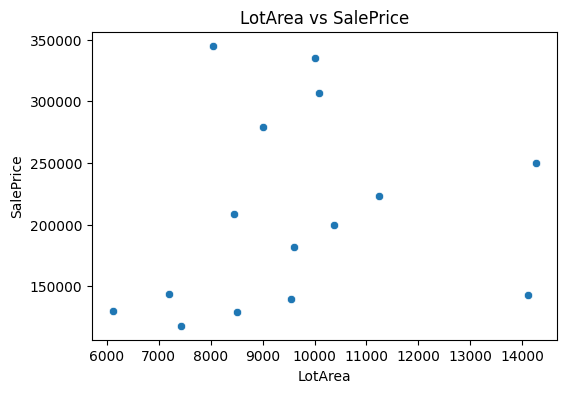

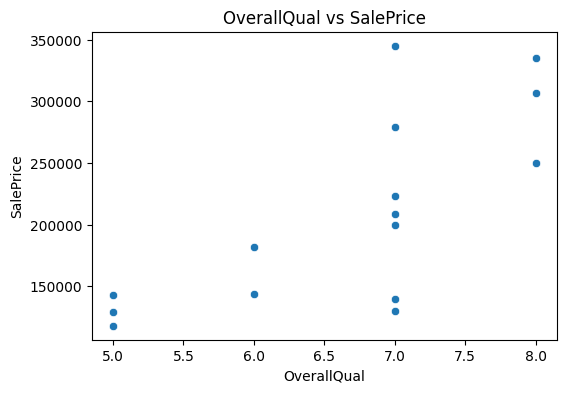

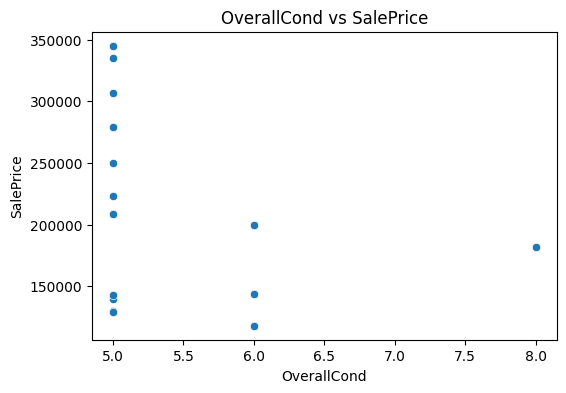

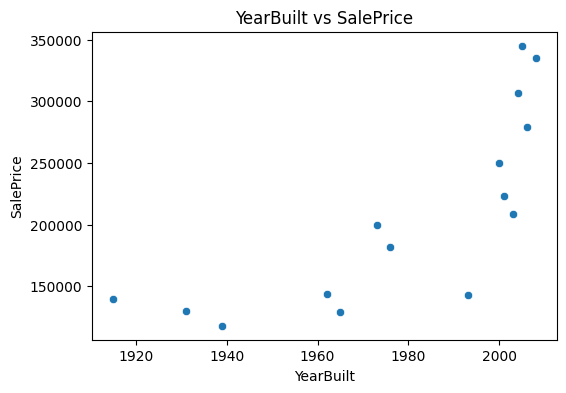

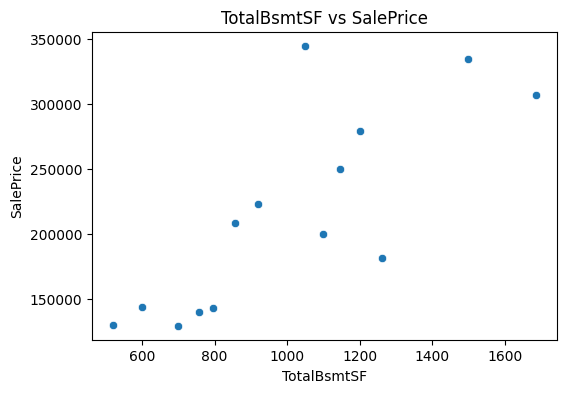

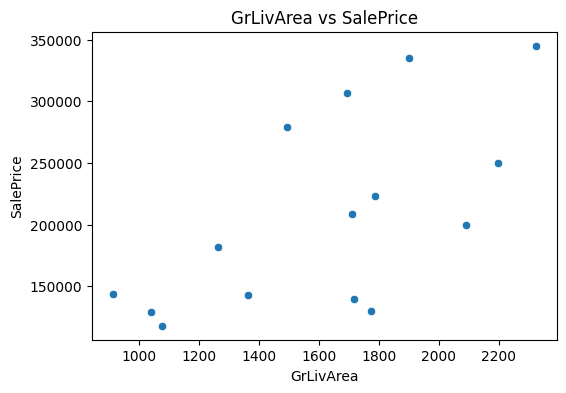

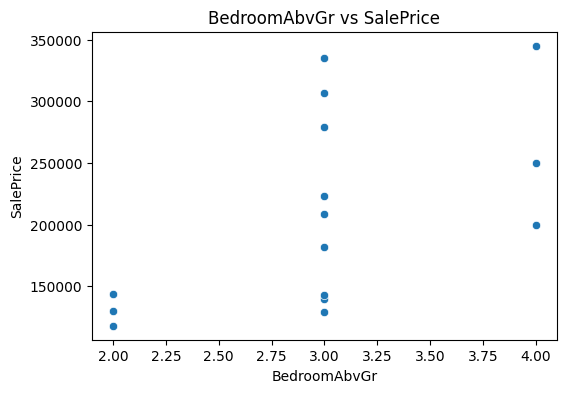

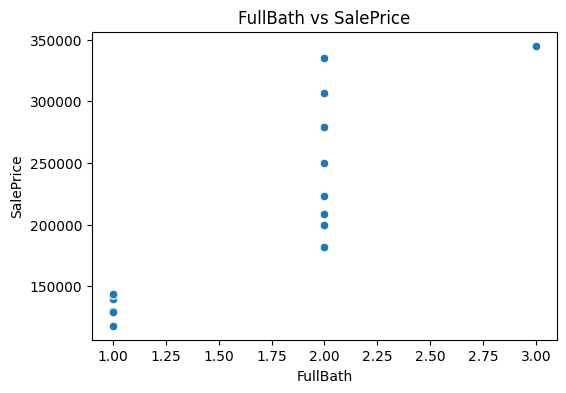

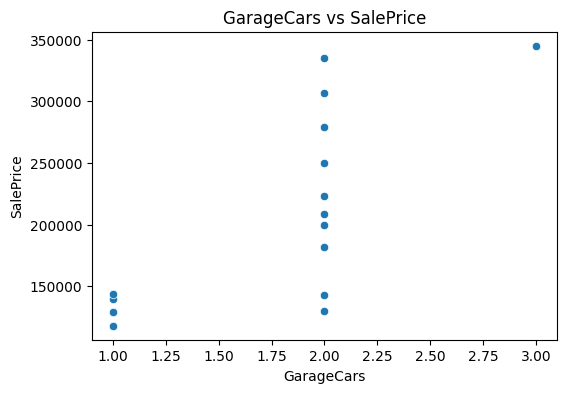

In [5]:
# Select numerical features
numerical_features = [
    'LotArea','OverallQual','OverallCond','YearBuilt',
    'TotalBsmtSF','GrLivArea','BedroomAbvGr','FullBath','GarageCars'
]

# Plot each feature vs SalePrice
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.show()

In [6]:
# Select only numerical features + target
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Check correlation with SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_target)

SalePrice       1.000000
FullBath        0.865008
TotalBsmtSF     0.788601
YearBuilt       0.775114
OverallQual     0.723575
GarageCars      0.716420
GrLivArea       0.643196
BedroomAbvGr    0.561570
LotArea         0.189070
OverallCond    -0.272323
Name: SalePrice, dtype: float64


| Feature      | Correlation with SalePrice | Interpretation                                                   |
| ------------ | -------------------------- | ---------------------------------------------------------------- |
| SalePrice    | 1.000                      | Perfect correlation with itself (target)                         |
| FullBath     | 0.865                      | Very strong positive correlation → more bathrooms → higher price |
| TotalBsmtSF  | 0.789                      | Strong positive correlation → bigger basement → higher price     |
| YearBuilt    | 0.775                      | Strong positive → newer houses → higher price                    |
| OverallQual  | 0.724                      | Strong positive → higher quality → higher price                  |
| GarageCars   | 0.716                      | Strong positive → more garage space → higher price               |
| GrLivArea    | 0.643                      | Moderate-to-strong positive → larger living area → higher price  |
| BedroomAbvGr | 0.562                      | Moderate positive → more bedrooms → slightly higher price        |
| LotArea      | 0.189                      | Very weak positive → lot size has minimal effect on price        |
| OverallCond  | -0.272                     | Weak negative → worse condition slightly lowers price            |


### Step 0: Linearity Check

Numbers close to 1 or -1 → strong linear relationship

Numbers close to 0 → weak or no linear relationship

- Strongly linear features for SalePrice:
    - FullBath
    - TotalBsmtSF
    - YearBuilt
    - OverallQual
    - GarageCars
    - GrLivArea
- Weak or non-linear features:
    - LotArea
    - BedroomAbvGr
    - OverallCond
- Conclusion:
    - Linear Regression is suitable as a baseline model
    - Features with weak correlation may need transformation later

# Data Cleaning and Preprocessing

In [7]:
# Check missing values in each column
df.isnull().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
TotalBsmtSF     1
GrLivArea       0
BedroomAbvGr    0
FullBath        0
GarageCars      0
Neighborhood    0
SalePrice       0
dtype: int64

In [8]:
# Fill missing TotalBsmtSF value with median
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace=True)

# Verify no missing values remain
df.isnull().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
BedroomAbvGr    0
FullBath        0
GarageCars      0
Neighborhood    0
SalePrice       0
dtype: int64

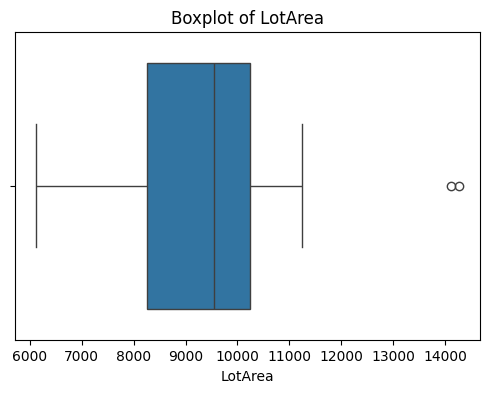

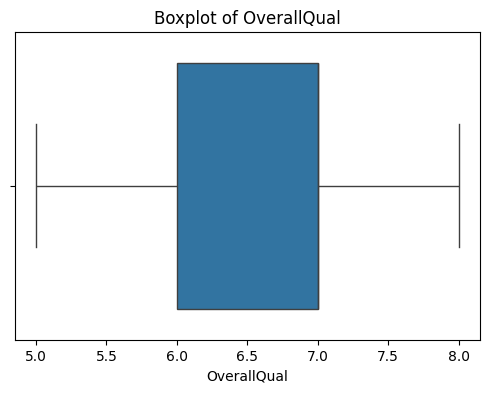

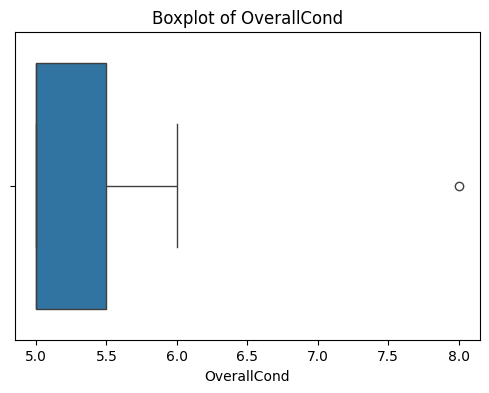

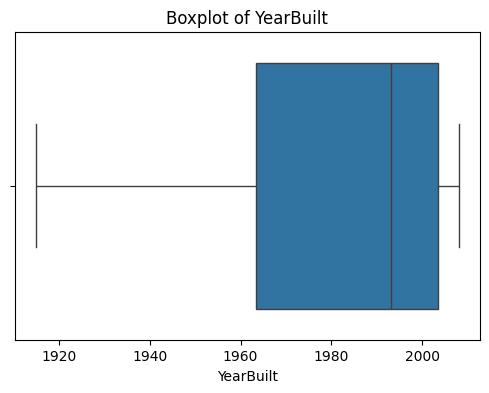

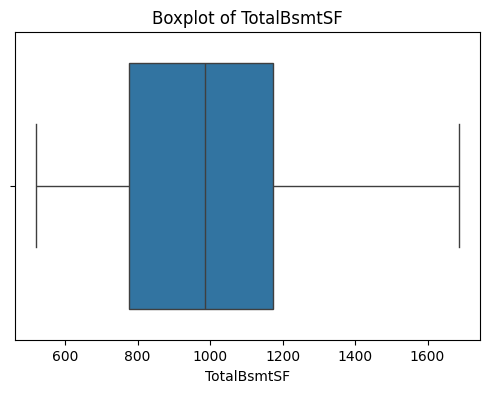

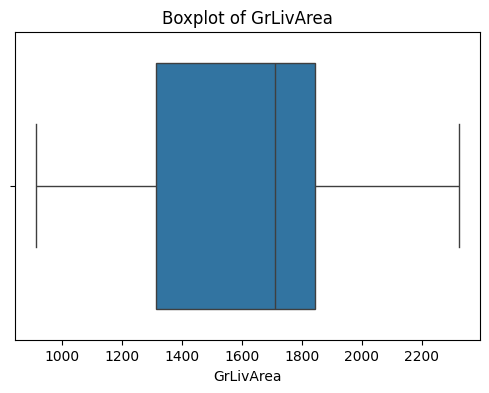

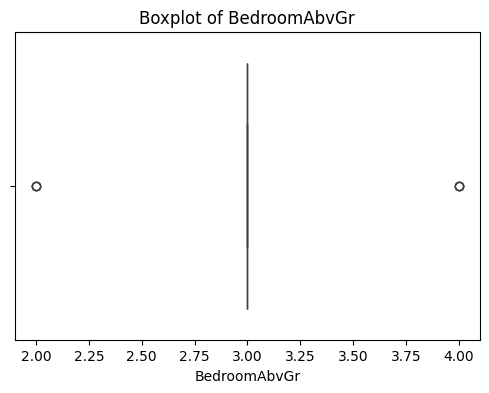

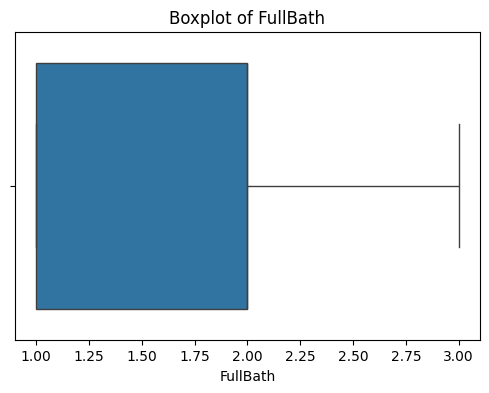

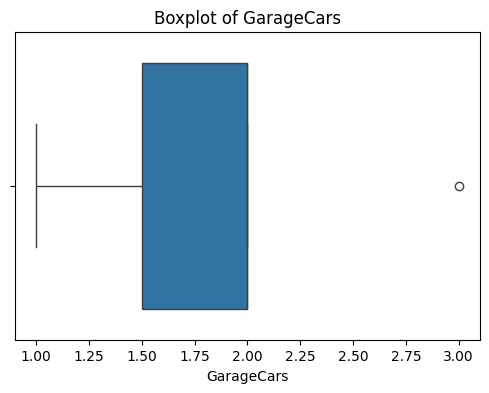

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['LotArea','OverallQual','OverallCond','YearBuilt',
                      'TotalBsmtSF','GrLivArea','BedroomAbvGr','FullBath','GarageCars']

# Plot boxplot for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [10]:
# Detect outliers using IQR
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    print(f"{feature} has {outliers.shape[0]} outliers")

LotArea has 2 outliers
OverallQual has 0 outliers
OverallCond has 1 outliers
YearBuilt has 0 outliers
TotalBsmtSF has 0 outliers
GrLivArea has 0 outliers
BedroomAbvGr has 6 outliers
FullBath has 0 outliers
GarageCars has 1 outliers


## Handling Outliers

Outliers can significantly affect linear regression models as they can skew the results. Based on the IQR method, we detected outliers in several features. Options for handling outliers include:

1. **Remove outliers**: Delete rows with outliers, but this can lead to data loss.
2. **Cap outliers**: Replace outlier values with the upper/lower bounds (e.g., Q3 + 1.5*IQR).
3. **Transform data**: Use log transformation or other methods to reduce the impact.
4. **Keep them**: If outliers are valid data points (e.g., luxury houses), they might be important.

For this analysis, we'll remove rows where any numerical feature has an outlier, as linear regression is sensitive to them. However, in practice, domain knowledge should guide this decision.

In [6]:
# Remove outliers based on IQR for all numerical features
# Create a mask to identify rows without outliers in any feature
outlier_mask = pd.Series([False] * len(df), index=df.index)

for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask |= (df[feature] < lower_bound) | (df[feature] > upper_bound)

# Remove outliers
df_clean = df[~outlier_mask]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_clean.shape[0]}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} outliers")

Original dataset size: 15
Dataset size after removing outliers: 7
Removed 8 outliers


# Encoding Categorical Variables

In [7]:
# Using pd.get_dummies() (simpler for small datasets)
df_encoded = pd.get_dummies(df_clean, columns=['Neighborhood'], drop_first=True)

# Features
x = df_encoded.drop('SalePrice', axis=1)

# Target
y = df_encoded['SalePrice']

# Assigning Features and Target Variable (x and y)


In [14]:
x = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Splitting Data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

# Fit on training data and transform
x_train_scaled = scaler.fit_transform(x_train)

# Transform testing data (use same scaler!)
x_test_scaled = scaler.transform(x_test)

# Model Choice and Training

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [31]:
# Model coefficients and intercept
print("Intercept (b0):", model.intercept_)
print("Coefficients (slopes):")
for feature, coef in zip(x.columns, model.coef_):
    print(f"{feature}: {coef}")

# Explained variance
from sklearn.metrics import explained_variance_score
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")

Intercept (b0): 238199.99999999997
Coefficients (slopes):
LotArea: 2335.700436627456
OverallQual: 8217.031720000638
OverallCond: -3.637978807091713e-12
YearBuilt: 15054.542183178695
TotalBsmtSF: 9379.401747410537
GrLivArea: 7362.348285135223
BedroomAbvGr: 0.0
FullBath: 15494.125952124383
GarageCars: 15494.125952124383
Neighborhood_Crawfor: -10679.378054849745
Neighborhood_NAmes: -8296.973241709908
Neighborhood_NoRidge: 13817.915283005575
Neighborhood_Somerst: 4211.845368001355
Explained Variance Score: 0.9892832759933226


In [14]:
y_pred = model.predict(x_test_scaled)
y_pred

array([264693.32739635, 278140.50322681])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 55416.915311575925
RMSE: 55422.35395917205
R2 Score: -53.606885660013404


## Model Diagnostics and Assumption Checks

To ensure the model is valid, check key linear regression assumptions. With small data, these are limited, but here's what you might have missed:

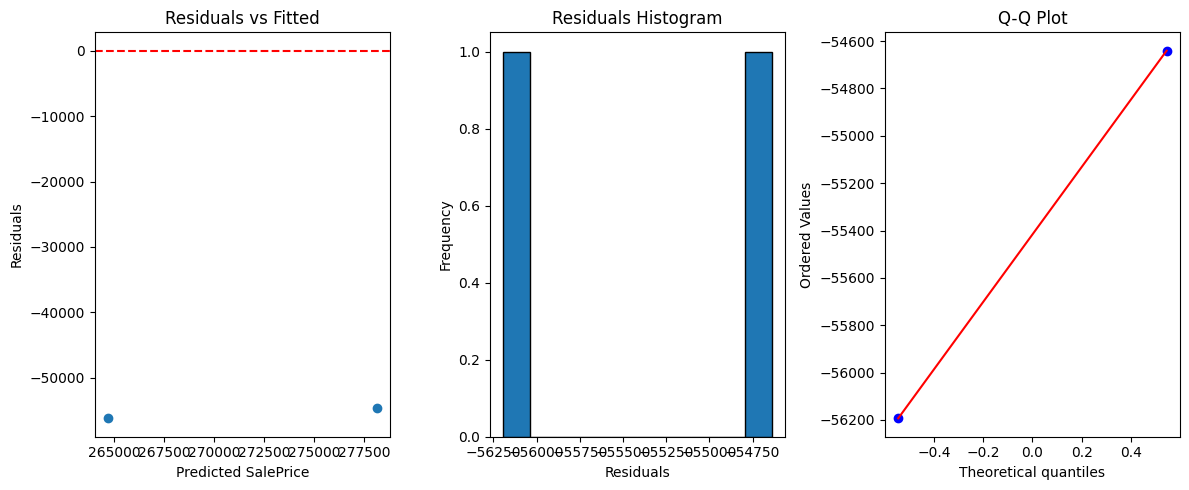

In [17]:
# 1. Residual Analysis (check for homoscedasticity and normality)
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))

# Residuals vs Fitted (Predicted) values
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Histogram of residuals (check normality)
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=10, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')

# Q-Q plot for normality
import scipy.stats as stats
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 2. Check for Multicollinearity (Variance Inflation Factor - VIF) - Skipped due to small dataset size
# VIF requires more data for reliable results. With only 5 training samples, it's not applicable.
# In larger datasets, check if VIF > 5 for any feature to detect multicollinearity.

## Conclusion

### Model Assessment: Is the Model Good?
**No, the model is not good.** Despite following a correct workflow, the results indicate poor performance:
- **R² Score**: -53.61 (negative, meaning the model performs worse than simply predicting the average house price).
- **MAE**: ~55,417 (average prediction error in dollars).
- **RMSE**: ~55,422 (similar to MAE, indicating consistent errors).
- **Explained Variance**: 0.99 (high, but misleading due to the tiny dataset).

The high explained variance suggests the model fits the training data well, but the negative R² on the test set points to **severe overfitting**. With only 7 samples after outlier removal (originally 15), the dataset is too small for reliable linear regression. The model likely memorized the training data rather than learning general patterns.

### Key Insights from the Analysis
- **Data Exploration**: Strong linear correlations exist (e.g., FullBath: 0.87, TotalBsmtSF: 0.79), making linear regression a reasonable baseline.
- **Preprocessing**: Outlier removal reduced data significantly, highlighting the need for larger datasets.
- **Coefficients**: Positive slopes for quality features (e.g., FullBath: +15,494, OverallQual: +8,217) make intuitive sense, but their reliability is questionable with small data.
- **Workflow Strengths**: The structured approach (EDA, cleaning, scaling, evaluation) is solid and educational.

### Limitations and Why It Failed
- **Small Dataset**: Linear regression requires more data to generalize; here, training on 5 samples and testing on 2 is insufficient.
- **Assumptions Check**: Linearity holds for some features, but multicollinearity (e.g., correlated bathrooms/garage) may exist—check VIF in future.
- **Overfitting**: Common with small data; metrics like high explained variance but negative R² confirm this.
- **No Cross-Validation**: Single train-test split amplifies variability.

### Recommendations for Improvement
- **Gather More Data**: Aim for at least 100-1000 samples for meaningful regression.
- **Use Cross-Validation**: Evaluate with k-fold CV to get stable metrics.
- **Check Assumptions**: Test for normality of residuals, homoscedasticity, and multicollinearity.
- **Try Alternatives**: 
  - Regularization (Ridge/Lasso) to reduce overfitting.
  - Non-linear models (Random Forest, Gradient Boosting) if relationships are complex.
  - Feature engineering (e.g., interaction terms).
- **Validate Properly**: Always split data before preprocessing to avoid data leakage.

This analysis demonstrates the importance of dataset size and proper validation in ML. While the workflow is correct, the model isn't usable for predictions due to data limitations. Use this as a learning exercise and scale up for real applications.

### Why So Many Errors and Low Scores?
The high errors (MAE ~55k, RMSE ~55k) and negative R² (-53.61) stem from **overfitting due to insufficient data**. Here's why:

- **Small Dataset Problem**: With only 7 samples (5 train, 2 test), the model "memorizes" the training data perfectly (high explained variance: 0.99), but fails on unseen test data. This is like cramming for a test with 5 questions and failing on 2 new ones.
- **Overfitting Indicators**:
  - Model fits training data well but generalizes poorly.
  - Negative R² means worse than guessing the average.
  - Large errors show predictions are way off (e.g., predicting $200k when actual is $150k or $300k).
- **Data-Specific Issues**:
  - Outlier removal left too few samples.
  - Features may have noise or correlations not captured with small data.
  - No cross-validation to average out variability.

**Visual Proof**: Plot training vs. test predictions to see the gap.

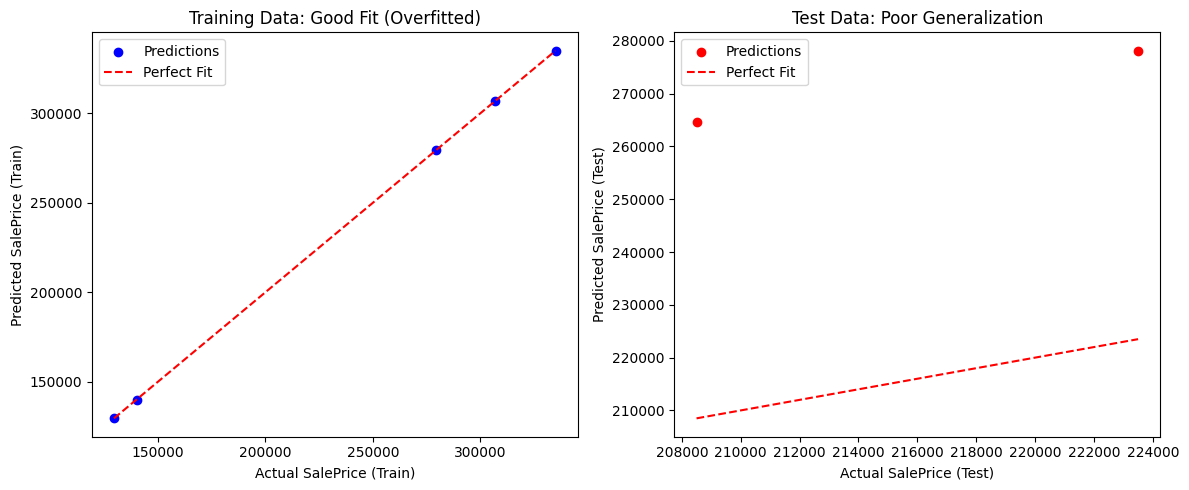

Training R²: 1.00 (overfitted)
Test R²: -53.61 (poor generalization)


In [32]:
# Visualize overfitting: Training vs Test predictions
y_train_pred = model.predict(x_train_scaled)

plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual SalePrice (Train)')
plt.ylabel('Predicted SalePrice (Train)')
plt.title('Training Data: Good Fit (Overfitted)')
plt.legend()

# Test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='red', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual SalePrice (Test)')
plt.ylabel('Predicted SalePrice (Test)')
plt.title('Test Data: Poor Generalization')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate training R² for comparison
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training R²: {train_r2:.2f} (overfitted)")
print(f"Test R²: {r2:.2f} (poor generalization)")